In [125]:
from collections import defaultdict
import itertools
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [99]:
pd.set_option('notebook_repr_html', False)

In [2]:
%matplotlib inline
plt.rc('figure', figsize=(15.0, 8.0))

In [80]:
def array_shuffle(arr):
    hp = int(len(arr) / 2)
    copy = arr.copy()
    copy[1:-1:2] = arr[hp:-1:1]
    copy[2:-1:2] = arr[1:hp]
    return copy

In [201]:
def is_shuffled(arr):
    return arr[1] == 1

In [202]:
def rec_perfect_shuffle(arr, count=0):
    if count > 0 and is_shuffled(arr):
        return count
    next_arr = array_shuffle(arr)
    return rec_perfect_shuffle(next_arr, count=count + 1)

In [27]:
def fast_perfect_shuffle(n):
    '''Follows the second item in a hypothetical array until it reaches its original position'''
    two_n = n * 2
    count = 0
    pos = 1
    while True:
        if pos < n:
            pos *= 2
        else:
            pos -= two_n - pos - 1
        count += 1
        if pos == 1:
            break
    return count

In [158]:
def perfect_shuffle(n):
    arr = np.arange(n * 2)
    dct = {x: [x] for x in arr}
    while True:
        arr = array_shuffle(arr)
        for i, x in enumerate(arr):
            dct.get(x).append(i)
        if is_shuffled(arr):
            break
    return dct

In [ ]:
def mkplot(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('n')
    ax.set_ylabel('shuffles')
    ax.grid(True)
    ax.scatter(x, y)

## Bulk Shuffle

In [ ]:
counts = {i: fast_perfect_shuffle(i) for i in range(2, 1001)}

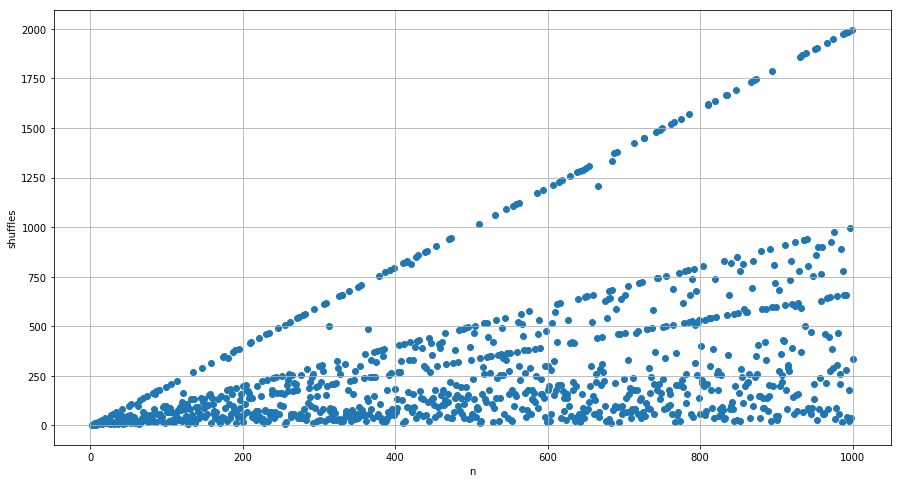

In [83]:
mkplot(list(counts.keys()), list(counts.values()))

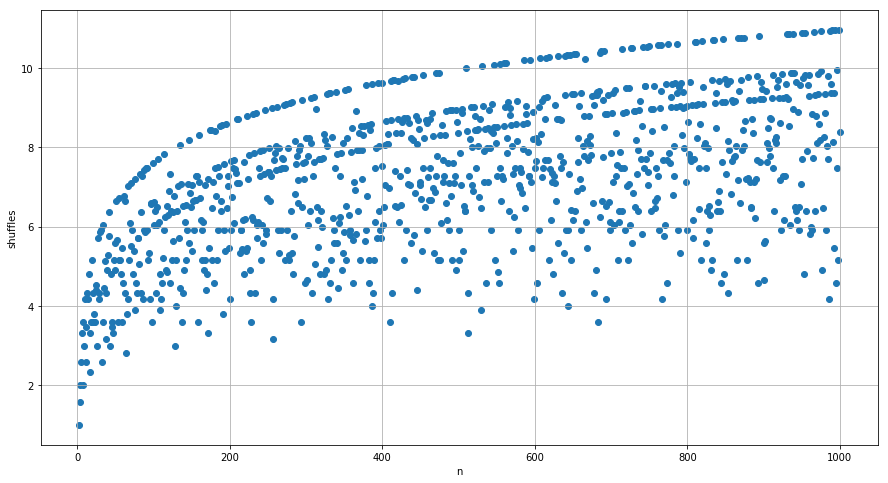

In [84]:
mkplot(list(counts.keys()), list(map(lambda v: np.log2(v), counts.values())))

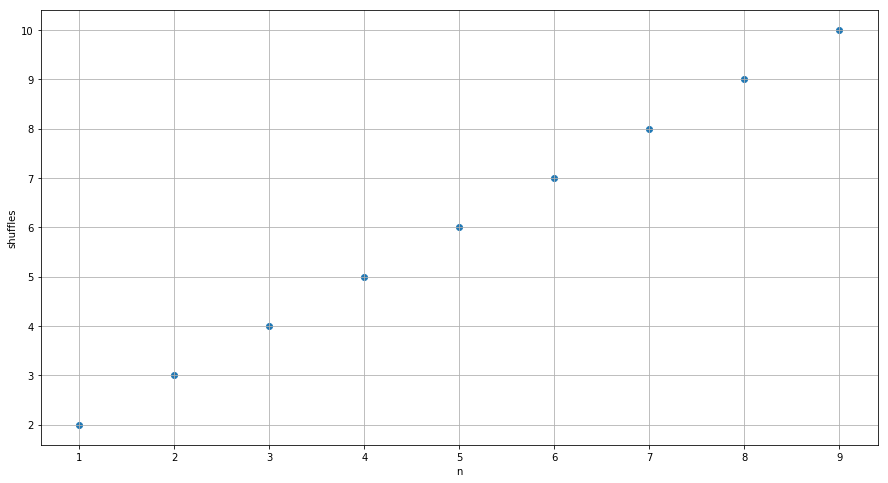

In [11]:
def filter_fn(args):
    k, v = args
    return np.log2(k) % 1 == 0

filtered = dict(filter(filter_fn, counts.items()))
mkplot(list(map(lambda v: np.log2(v), filtered.keys())), list(filtered.values()))

## Single Shuffle

In [159]:
perfect_shuffle(3)

{0: [0, 0, 0, 0, 0],
 1: [1, 2, 4, 3, 1],
 2: [2, 4, 3, 1, 2],
 3: [3, 1, 2, 4, 3],
 4: [4, 3, 1, 2, 4],
 5: [5, 5, 5, 5, 5]}

In [160]:
perfect_shuffle(8)

{0: [0, 0, 0, 0, 0],
 1: [1, 2, 4, 8, 1],
 2: [2, 4, 8, 1, 2],
 3: [3, 6, 12, 9, 3],
 4: [4, 8, 1, 2, 4],
 5: [5, 10, 5, 10, 5],
 6: [6, 12, 9, 3, 6],
 7: [7, 14, 13, 11, 7],
 8: [8, 1, 2, 4, 8],
 9: [9, 3, 6, 12, 9],
 10: [10, 5, 10, 5, 10],
 11: [11, 7, 14, 13, 11],
 12: [12, 9, 3, 6, 12],
 13: [13, 11, 7, 14, 13],
 14: [14, 13, 11, 7, 14],
 15: [15, 15, 15, 15, 15]}

In [112]:
df = pd.DataFrame(perfect_shuffle(8))

In [113]:
df

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
0   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
1   0   2   4   6   8  10  12  14   1   3   5   7   9  11  13  15
2   0   4   8  12   1   5   9  13   2   6  10  14   3   7  11  15
3   0   8   1   9   2  10   3  11   4  12   5  13   6  14   7  15
4   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15

In [105]:
df > len(df.columns) / 2

      0      1      2      3      4      5      6      7      8      9   \
0  False  False  False  False  False  False  False  False  False   True   
1  False  False  False  False  False   True   True   True  False  False   
2  False  False  False   True  False  False   True   True  False  False   
3  False  False  False   True  False   True  False   True  False   True   
4  False  False  False  False  False  False  False  False  False   True   

      10     11     12     13     14    15  
0   True   True   True   True   True  True  
1  False  False   True   True   True  True  
2   True   True  False  False   True  True  
3  False   True  False   True  False  True  
4   True   True   True   True   True  True  

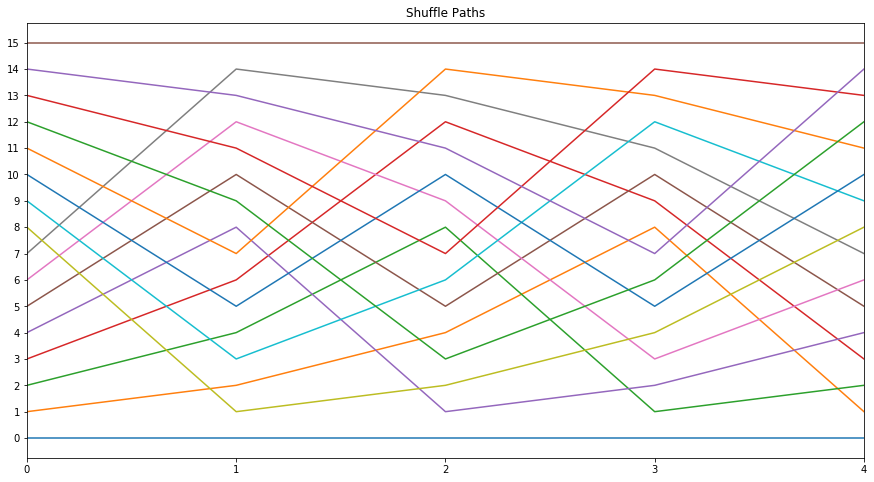

In [203]:
df.plot.line(title='Shuffle Paths', xticks=range(len(df)), yticks=range(len(df.columns)), legend=False)

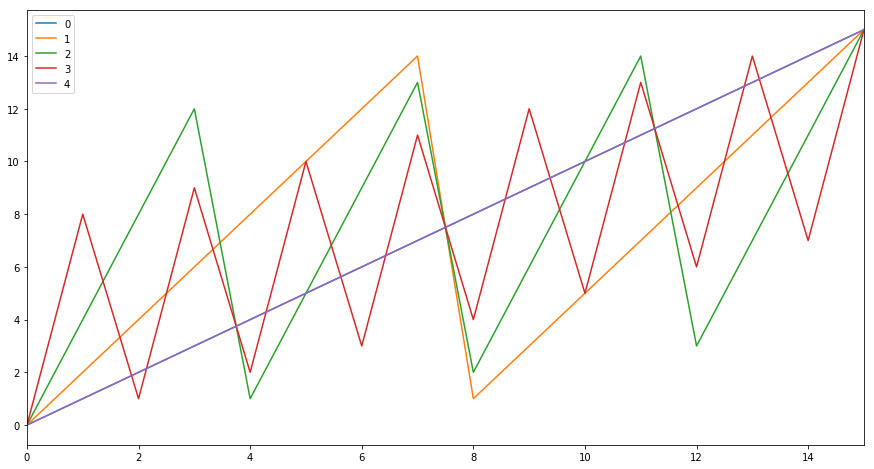

In [110]:
df.T.plot.line()

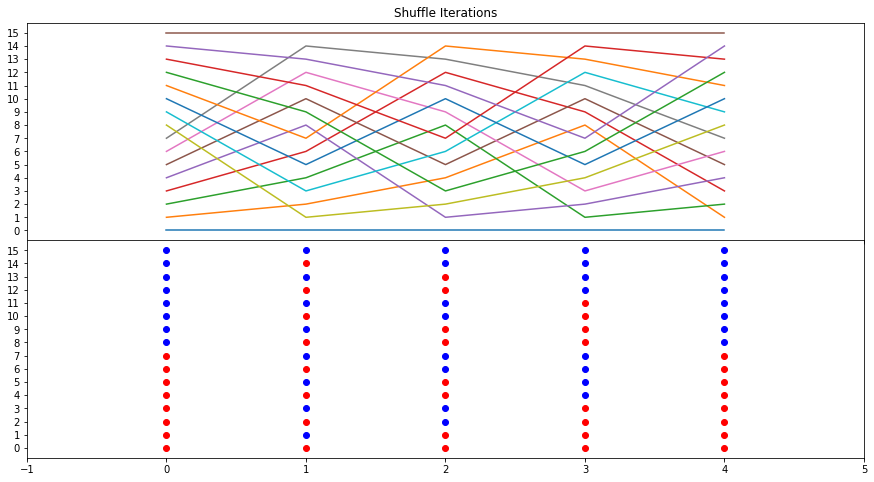

In [204]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)

df.plot.line(ax=ax1, legend=False, title='Shuffle Iterations')

bdf = df >= len(df.columns) / 2
bdf.index = reversed(bdf.index)
pairs = itertools.product(*map(lambda ax: ax.values, bdf.axes))

for i, j in pairs:
    c = 'b' if bdf.loc[i,j] else 'r'
    ax2.plot(i, j, c=c, marker='o')

ax1.set_xticks(range(-1, len(df) + 1))
ax1.set_yticks(range(len(df.columns)))

ax2.set_xticks(range(-1, len(df) + 1))
ax2.set_yticks(range(len(df.columns)))

f.subplots_adjust(hspace=0)

In [194]:
string_rep = (bdf
              .applymap(lambda cell: 'A' if not cell else 'B')
              .apply(lambda x: ''.join(x), axis=1)
              .sort_index())

In [195]:
string_rep

0    AAAAAAAABBBBBBBB
1    ABABABABABABABAB
2    AABBAABBAABBAABB
3    AAAABBBBAAAABBBB
4    AAAAAAAABBBBBBBB
dtype: object

In [196]:
string_seq = ''.join(string_rep)

In [198]:
def make_freq(string, chunk):
    freq = defaultdict(int)
    for i in range(0, len(string_seq), chunk):
        freq[string_seq[i:i + chunk]] += 1
    return freq

In [199]:
make_freq(string_seq, 2)

defaultdict(int, {'AA': 16, 'AB': 8, 'BB': 16})

In [205]:
make_freq(string_seq, 3)

defaultdict(int,
            {'AAA': 6,
             'AAB': 2,
             'ABA': 3,
             'ABB': 3,
             'BAA': 2,
             'BAB': 3,
             'BB': 1,
             'BBA': 2,
             'BBB': 5})

In [206]:
make_freq(string_seq, 4)

defaultdict(int, {'AAAA': 6, 'AABB': 4, 'ABAB': 4, 'BBBB': 6})